# Import Modules

In [37]:
import pandas as pds
import numpy as np

import utils

# Load Data

In [38]:
target_vegetable = "トマト"
training_size = 4000

In [39]:
train_test = pd.read_csv("./data/mapped_train_test.csv")
train_test["date"] = pd.to_datetime(train_test["date"], format="%Y-%m-%d")
weather = pd.read_csv("./data/sorted_mapped_adjusted_weather.csv")
train_test = pd.concat([train_test, weather], axis=1)

train_test["year"] = train_test.date.dt.year
years = pd.get_dummies(train_test["year"])
train_test = train_test.drop(columns="year")
train_test = pd.concat([train_test, years], axis=1)

train_test["month"] = train_test.date.dt.month
months = pd.get_dummies(train_test["month"])
train_test = train_test.drop(columns="month")
train_test = pd.concat([train_test, months], axis=1)

# train_test["weekday"] = train_test.date.dt.weekday
# weekdays = pd.get_dummies(train_test["weekday"])
# train_test = train_test.drop(columns="weekday")
# train_test = pd.concat([train_test, weekdays], axis=1)

areas = pd.get_dummies(train_test["area"])
train_test = train_test.drop(columns="area")
train_test = pd.concat([train_test, areas], axis=1)

train = train_test[:pd.read_csv("./data/train.csv").shape[0]]

target_values = utils.get_target_values(train, target_vegetable)
train_loader, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=training_size)

# Set Free Params

In [40]:
future = test.shape[0]
num_epochs = 200
learning_rate = 0.001
weight_decay = 1e-3
patience = 30

# Training

early stop at: 0.4237319529056549


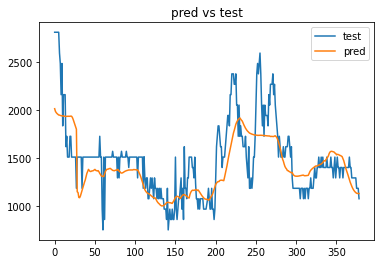

In [41]:
pred_y, _ = utils.pipeline_rnn(train_loader, train, test, test_y, future=future,
                               num_epochs=num_epochs, lr=learning_rate, weight_decay=weight_decay, patience=patience)

pred_y = pred_y.cpu().detach().numpy()
pred = np.concatenate([pred_y.reshape(-1, 1), test[:, 1:]], axis=1)

utils.plot_prediction(pred, test, ss)

# Terminal Score

In [42]:
utils.get_terminal_score()

だいこん: 
early stop at: 0.45733213424682617
にんじん: 
early stop at: 0.4932742416858673
キャベツ: 
early stop at: 0.2752569019794464
レタス: 
early stop at: 1.4647750854492188
はくさい: 
early stop at: 0.6694234013557434
こまつな: 
early stop at: 0.3651423156261444
ほうれんそう: 
early stop at: 0.465217262506485
ねぎ: 
early stop at: 2.0171701908111572
きゅうり: 
early stop at: 0.45480284094810486
トマト: 
early stop at: 0.5246383547782898
ピーマン: 
early stop at: 0.30181559920310974
じゃがいも: 
early stop at: 1.3014050722122192
なましいたけ: 
early stop at: 0.15356257557868958
セルリー: 
early stop at: 0.4620739817619324
そらまめ: 
early stop at: 1.7965956926345825
ミニトマト: 
early stop at: 0.5242888927459717
MSE: 0.7329234089702368(0.5563499280076575)
